## Exam
Réponse de Kelun

In [28]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [29]:
df1 = pd.read_csv('data/exam/data_1.csv')

In [30]:
df1.head(5)

,Unnamed: 0,t,I
0,0,0,10.000000
1,1,1,24.596402
2,2,2,60.491800
3,3,3,148.735968
4,4,4,366.047216


In [31]:
df2 = pd.read_csv('data/exam/data_2.csv')

In [32]:
df2.head(5)

,Unnamed: 0,t,I
0,0,0,100.000000
1,1,1,100.499747
2,2,2,101.001976
3,3,3,101.506700
4,4,4,102.013930


In [33]:
df3 = pd.read_csv('data/exam/data_3.csv')

In [34]:
df3.head(5)

,Unnamed: 0,t,I
0,0,0,1.000000
1,1,1,1.349870
2,2,2,1.822129
3,3,3,2.459584
4,4,4,3.320416


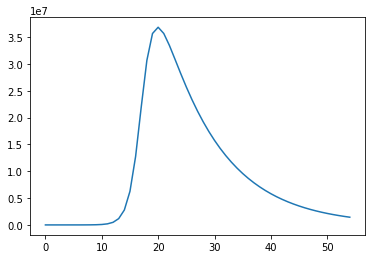

In [35]:
plt.plot(df1["I"])

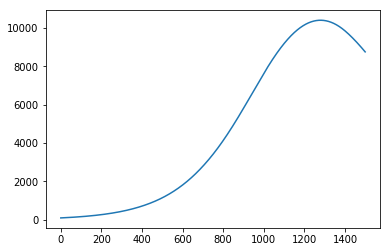

In [36]:
plt.plot(df2["I"])

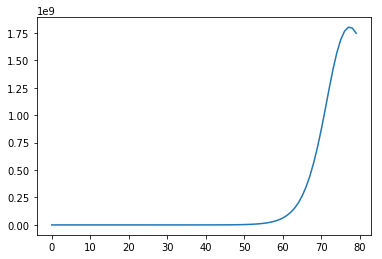

In [37]:
plt.plot(df3["I"])

In [38]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [46]:
N = 55_000_000
I0, R0 = 10, 0
S0 = N-I0-R0
beta, gamma = 0, 0
t=range(df1.shape[0])

y0 = S0,I0,R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [47]:
f = lambda t, beta, gamma : (odeint(deriv, y0, t, args=(N, beta, gamma)).T)[1]

In [48]:
params, covariance = curve_fit(f, t, df1["I"]) # fit
print(params)

[1.00013692 0.09999554]


/home/klchai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/home/klchai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/home/klchai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/home/klchai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [49]:
N = 67_000
I0, R0 = 100, 0
S0 = N-I0-R0
beta, gamma = 0.3,0.1
t=range(df2.shape[0])

y0 = S0,I0,R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [50]:
params, covariance = curve_fit(f, range(df2.shape[0]), df2["I"]) # fit
print(params)

[0.00996148 0.0049657 ]


In [51]:
N = 7_700_000_000
I0, R0 = 1,0
S0 = N-I0-R0
beta, gamma = 0.3,0.1
t=range(df3.shape[0])

y0 = S0,I0,R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [52]:
params, covariance = curve_fit(f, range(df3.shape[0]), df3["I"]) # fit
print(params)

/home/klchai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/home/klchai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/home/klchai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/home/klchai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


[0.49916021 0.19919598]
